# Stackoverflow Survey Data Analysis

In this file, I intend to practice data analysis techniques, by analyzing the data from the 2018 Stackoverflow Developer Survey.

The original data can be foun [here](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey).

To begin, let's read the data.

In [2]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [3]:
responses = read_csv('survey_results_public.csv')
schema_raw = read_csv('survey_results_schema.csv')

In [4]:
schema = {}
for row in schema_raw:
    schema[row['Column']] = row['QuestionText']
    
### Uncomment following code to display data schema: ###
# print("The schema of the gathered data:")
# print()
# for key in schema.keys():
#     print("Question key: {}".format(key))
#     print("\tText: {}".format(schema[key]))

After delving into the scheme and responses for a while, I came up with several questions I wanted answered, at least to begin with:
1. How do JobSearchStatus/HopeFiveYears correlate to job/career satisfaction? to country? to years coding?
2. How does job/career satisfaction correlate to company size?
3. How does employment correlate to years coding?
4. How do students compare to non-students in terms of job/career satisfaction?
5. How do open-source coders compare to non-os in terms of job/career satisfaction?
6. How does open-source correlate to years coding?
7. How do people with non-related degrees compare to regulars in pretty much everything?
8. How does DevType relate to job/career satisfaction?
9. Are certain values of DevType taken by people with a lot of years coding?
10. Are there any non-hobbyists? How do they compare to hobbyists in pretty much everything?
11. How does country relate to formal education?
12. How do non-hobbyists compare in terms of job/career satisfaction?

Let's go ahead and start picking out interesting questions.

### Question #3
"How does employment status correlate to years coding?"  
To make the initial question clearer and the responses more readable, we'll rephrase it:

**How does one's experience in coding, both professionally and generally, relate to one's employment status?**

In [56]:
## general helper functions ##

def get_dict_keys_by_column(column: str) -> dict:
    """ Returns dictionary with keys as unique answers for given column,
        and default value 0. """
    column_values = {response[column] for response in responses}
    return dict.fromkeys(column_values, 0)
    
def get_dict_of_dicts_by_columns(column: str, nested_column: str) -> dict:
    """ Returns dictionary with keys as unique answers for given column,
        and values as dictionaries with keys as unique answers for given inner column, and defualt value 0. """
    column_values = {response[column] for response in responses}
    nested_dict = get_dict_keys_by_column(nested_column).copy()
    return {value: dict(nested_dict) for value in column_values} # TODO try with possible duplication

def get_data_by_columns(column: str, nested_column: str) -> dict:
    """ Returns dictionary with keys as unique answers for given column,
        and values as dictionaries with keys unique answers for given inner column, 
        the values of which are the total amount of respondents who have matching unique answer (for inner column)."""
    data_dict = get_dict_of_dicts_by_columns(column, nested_column)
    for key in data_dict.keys():
        for response in [resp for resp in responses if resp[column] == key]:
            response_value = response[nested_column]
            data_dict[key][response_value] += 1 # increase count of current responses value in total count
    return data_dict

In [57]:
years_coding_by_employment = get_data_by_columns('Employment', 'YearsCoding')
years_coding_prof_by_employment = get_data_by_columns('Employment', 'YearsCodingProf')

In [58]:
import pandas as pd

print("Years coding by employment status of developer:")
# TODO: Find less hard-coded way to explicitly reindex dataframe
row_labels = ['0-2 years', '3-5 years', '6-8 years', '9-11 years', '12-14 years',
              '15-17 years', '18-20 years', '21-23 years', '24-26 years', '27-29 years', '30 or more years', 'NA']
column_labels = ['Employed part-time', 'Employed full-time', 'Independent contractor, freelancer, or self-employed',
                 'Not employed, but looking for work', 'Not employed, and not looking for work', 'Retired', 'NA']

# YBE = Years by Employment
frame_ybe = pd.DataFrame(years_coding_by_employment)
frame_ybe.reindex(index=row_labels, columns=column_labels)
# pd.DataFrame.from_dict(years_coding_by_employment, orient='index')

Years coding by employment status of developer:


,Employed part-time,Employed full-time,"Independent contractor, freelancer, or self-employed","Not employed, but looking for work","Not employed, and not looking for work",Retired,NA
0-2 years,795,5362,763,2005,1283,32,442
3-5 years,2008,15419,1750,2053,1596,11,476
6-8 years,1136,15009,1481,750,732,11,219
9-11 years,496,9976,1121,288,194,4,90
12-14 years,242,6666,884,135,69,4,30
15-17 years,146,5024,793,92,27,6,29
18-20 years,113,4095,679,104,39,13,29
21-23 years,56,2132,358,70,12,7,13
24-26 years,35,1477,296,35,7,5,7
27-29 years,21,820,173,21,12,3,10


In [59]:
print("Years coding professionally by employment status of developer:")

frame_ybe_prof = pd.DataFrame(years_coding_prof_by_employment).sort_index()
frame_ybe_prof.reindex(index=row_labels, columns=column_labels)

Years coding professionally by employment status of developer:


,Employed part-time,Employed full-time,"Independent contractor, freelancer, or self-employed","Not employed, but looking for work","Not employed, and not looking for work",Retired,NA
0-2 years,2278,14234,1824,2801,1762,15,507
3-5 years,970,17850,1614,541,229,7,151
6-8 years,267,9768,1080,165,47,5,53
9-11 years,108,6393,928,81,37,8,18
12-14 years,84,3549,570,48,14,6,16
15-17 years,50,2418,487,38,9,4,6
18-20 years,41,2275,457,38,6,7,6
21-23 years,21,1082,237,15,5,2,6
24-26 years,12,621,187,19,6,5,7
27-29 years,6,382,92,12,3,6,5


Some interesting points that pop out:
1. As could be expected, most of the respondents are employed full-time. 
2. The greatest concentration of full-time-working respondents is between 0-8 years of coding professionally and 3-11 years of coding in general.  
Relatively few full-time employees have 0-2 years of experience coding in general.
3. Comparing the "Not employed, but looking for work" columns, it's easy to see there's a drastic drop of respondents in the professional column who have more than 2 years of experience.  
Meanwhile, looking at the non-professional column, we see a similar drop-off exists for respondents who have over 9 years of coding experience!

Let's draw in on point #2:
* One possible conclusion is that to be accepted to a job where you can get get professional coding experience, you'd need to have at least some experience in coding non-professionally.
* It seems that the as time progresses, less and less respondents are full-time employees. That could mean a number of things:
   * Many could still be full-time employees in jobs that don't involving coding (or at least not full-time coding). Could be they've risen through the hierarchy of their workplaces to managerial or more business-related jobs.
   * Might be that having spent ~10 years coding wears one out, and causes them to seek another vocation, for any number of reason - tediousness, high-stress workplace attitude, etc.
   * Could be that as rumors foretell, at the ripe old age of not-that-very-old, the IT industry chooses to promote the younger and fresher programmers just out of university, than keep holding on to their aging employees.

Now let's shift out focus to point #3:
* It seems that having even a minimal 2 years of professional experience is enough to make finding other jobs (or at least, not having to be unemployed and search for one) a lot easier.
* On the other hand, the same drop-off in respondents who aren't unemployed-and-looking occurs at almost 10 years of general experience coding! We can't know from the data whether some of it *is* professional, but it seems that non-professional experience doesn't amount to much when looking for a job if you don't have a lot of it. 

### Question #12

Let's move on to another question: "How do non-hobbyists compare in terms of job/career satisfaction?", which we'll rephrase like so:

**How does career satisfaction correlate to coding as a hobby?**

In [60]:
career_satisfaction_by_hobby = get_data_by_columns('Hobby', 'CareerSatisfaction')
        
row_labels = ['Extremely satisfied', 'Moderately satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied',
              'Slightly dissatisfied', 'Moderately dissatisfied', 'Extremely dissatisfied', 'NA']

# CSH = Career Satisfaction by Hobby
frame_csh = pd.DataFrame(career_satisfaction_by_hobby)
frame_csh.reindex(index=row_labels)

,Yes,No
Extremely satisfied,12113,2203
Moderately satisfied,22965,4961
Slightly satisfied,10799,2685
Neither satisfied nor dissatisfied,5091,1225
Slightly dissatisfied,5111,1476
Moderately dissatisfied,4125,1137
Extremely dissatisfied,2075,538
NA,17618,4733


We can see a lot more respondents in the 'Yes' hobby column, which is to be expected - many programmers have an affinity for programming well before setting it as their career path (or foundation).

To make the comparison clearer, we'll standardize the results.

In [61]:
import numpy as np
from decimal import Decimal

def calc_percentage(x):
    return 100 * x / float(x.sum())

hobbyists_total_respondents = sum(value for value in list(career_satisfaction_by_hobby['Yes'].values()))
non_hobbyists_total_respondents = sum(value for value in list(career_satisfaction_by_hobby['No'].values()))

# TODO Loop can probably be replaced using pandas' .groupby method and its variations
for hobby_key in career_satisfaction_by_hobby.keys():
    for satisfaction_key in career_satisfaction_by_hobby[hobby_key].keys():
        respondents = career_satisfaction_by_hobby[hobby_key][satisfaction_key] 
        respondents_percentage = Decimal(respondents * 100 / \
                                    (hobbyists_total_respondents if hobby_key == 'Yes' else non_hobbyists_total_respondents))
        career_satisfaction_by_hobby[hobby_key][satisfaction_key] = round(respondents_percentage,2)
        
career_satisfaction_by_hobby['Difference'] = {satisfaction_key: \
        abs(career_satisfaction_by_hobby['Yes'][satisfaction_key] - career_satisfaction_by_hobby['No'][satisfaction_key])\
        for satisfaction_key in career_satisfaction_by_hobby['Yes'].keys()}

print("Results, each row in each column standardized as percentage of total respondents in column:")
frame_csh_updated = pd.DataFrame(career_satisfaction_by_hobby)
frame_csh_updated.reindex(index=row_labels)

Results, each row in each column standardized as percentage of total respondents in column:


,Yes,No,Difference
Extremely satisfied,15.16,11.62,3.54
Moderately satisfied,28.74,26.17,2.57
Slightly satisfied,13.52,14.16,0.64
Neither satisfied nor dissatisfied,6.37,6.46,0.09
Slightly dissatisfied,6.40,7.79,1.39
Moderately dissatisfied,5.16,6.00,0.84
Extremely dissatisfied,2.60,2.84,0.24
NA,22.05,24.97,2.92


Let's go one step further and visualize the results.

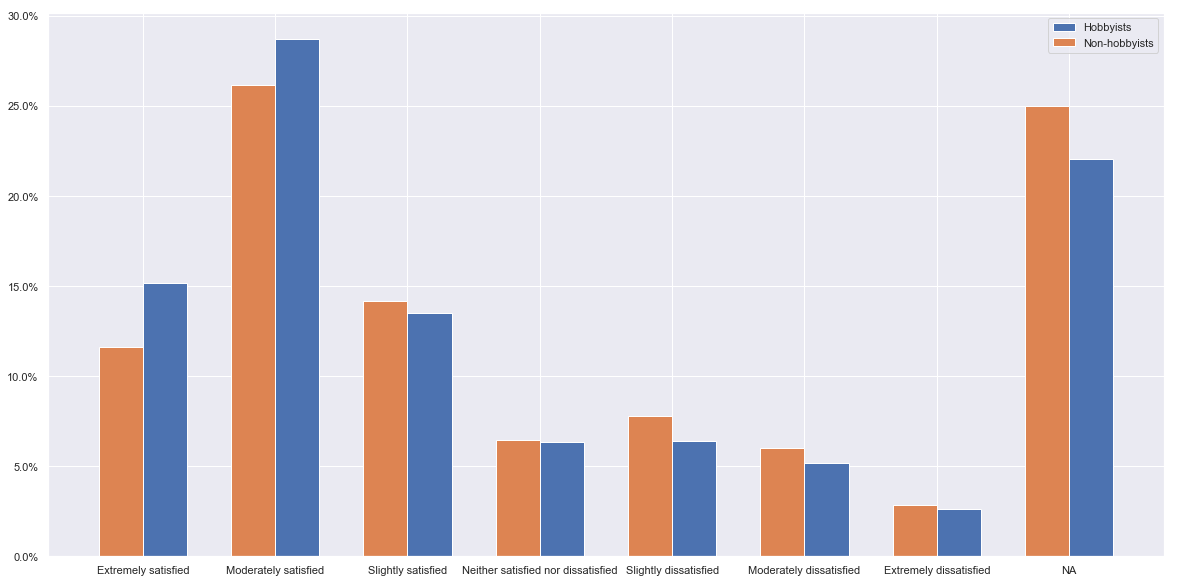

In [62]:
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def show_percentage(x, pos):
    # x is tick value, pos is tick position
    return '{}%'.format(x)

sns.set()

formatter = FuncFormatter(show_percentage)
indices = np.arange(len(row_labels))  # the x locations for the statuses
width = np.min(np.diff(indices))/3  # the width of the bars

hobbyists_ordered_results = [career_satisfaction_by_hobby['Yes'][key] for key in row_labels]
non_hobbyists_ordered_results = [career_satisfaction_by_hobby['No'][key] for key in row_labels]

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(indices + width/2, hobbyists_ordered_results, width=width, label='Hobbyists')
ax.bar(indices - width/2, non_hobbyists_ordered_results, width=width, label='Non-hobbyists')
ax.yaxis.set_major_formatter(formatter)
ax.legend()
plt.xticks(np.arange(8), row_labels)

plt.show()

Lets discuss the results.

* It's clear from the graph (and from the difference column in the above table) that there really isn't that much of a difference in terms of career satisfaction between programmers who code as a hobby or don't!  
The biggest difference is in respondents who are extremely satisfied with their careers, and even that is only a ~3.5% difference.  
There could be a number of possible reasons for this, and without any further data it's impossible to tell which are correct. Could be that this type of career brings more satisfaction to its pursuers than other career paths, thus equalizing the satisfaction between non-hobbyists and hobbyists. Or it could be that this career path is so unenjoyable the even hobbyists don't seem more satisfied than non-hobbyists, despite doing what they actually love doing as their job. Who knows?
* Generally speaking, most of the respondents are grouped in the 3 most-satisfied columns - extremely satisfied, moderately satisfied and slightly satisfied.  
Again, this could be interpreted in many ways. Could be that this career path is very satisfying compared to other career paths, or it actually could be that people who aren't satisfied with their career having to do with programming don't tend to participate in Stackoverflow's community, and consequently its surveys. It's also possible that people are generally accepting of their lifestyles, so the graph would look similar for respondents from entirely different career paths answering this question. Again, nothing can be determined without more data.

## Summary

This is a wrap on this little project for now.  
All in all, it turned out to be more about data visualization than about data analysis, using dataframes and graphs to summarize and convey the data and data proportions to the reader.

Obviously I can keep going, answering more of the questions mentioned in the beginning, and even going one step further by analyzing the responses for the questions posed in the survey, rather than just examining the demographics portrayed by the respondents.  
For now I'm not going to continue because of conflicting schedules and interests, but I'll definitely come back to this to improve upon my current results.